In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

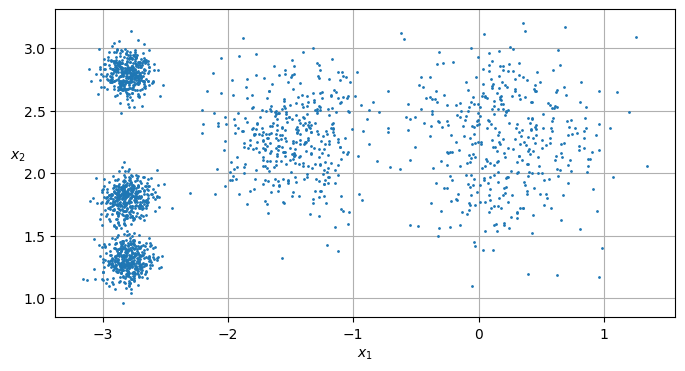

In [2]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [3]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [4]:
y_pred is kmeans.labels_

True

In [5]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [6]:
import numpy as np
X_new = np.array([[0,2], [3,2], [-3,3],[-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

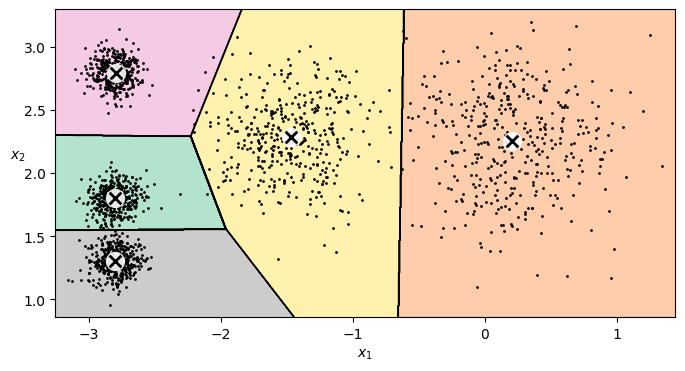

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [8]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

In [9]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

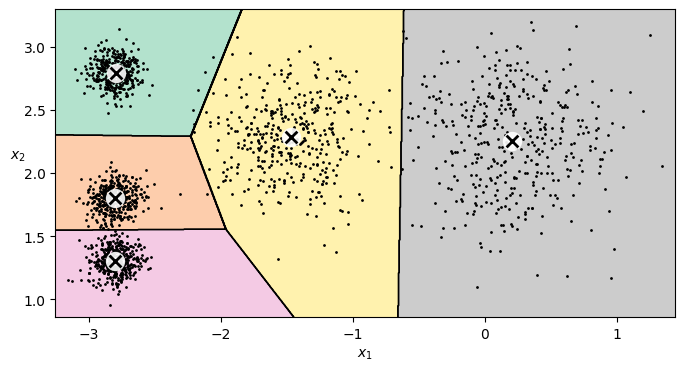

In [10]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

In [11]:
kmeans.inertia_

211.5985372581684

In [12]:
kmeans.score(X)

-211.59853725816834

In [13]:
from sklearn.cluster import MiniBatchKMeans

MiniBatchKMeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
MiniBatchKMeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [15]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [16]:
import urllib.request

import os
os.environ['http_proxy'] = "http://192.168.31.99:8001" 
os.environ['https_proxy'] = "http://192.168.31.99:8001" 

homl3_root = "https://github.com/ageron/handson-ml3/tree/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [17]:
import PIL
image =  np.asarray(PIL.Image.open(filepath))
image.shape


(533, 800, 3)

In [18]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segment_img = kmeans.cluster_centers_[kmeans.labels_]
segment_img = segment_img.reshape(image.shape)

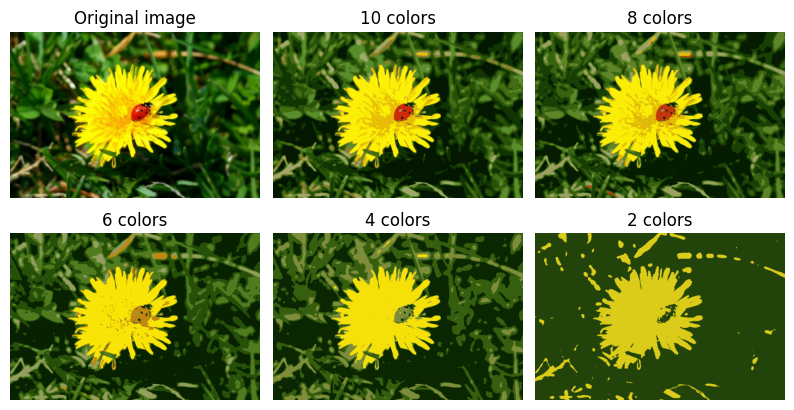

In [19]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

In [20]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [21]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [22]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [23]:
k=50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx]


/home/tmd/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


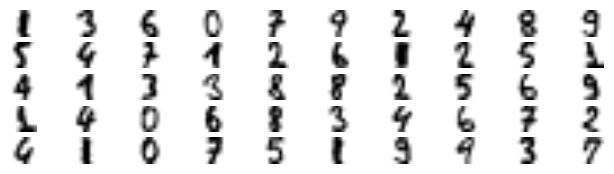

In [24]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [25]:
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

In [26]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)


0.8488664987405542

In [27]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/home/tmd/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8967254408060453

In [29]:
percentile_closet = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_== i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closet)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [30]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9093198992443325

In [31]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9755555555555555

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [33]:
dbscan.labels_

array([ 0,  1,  0,  0,  1,  0, -1,  2,  3,  3,  4, -1,  1,  4,  1,  0,  3,
        3,  4,  5,  0,  3,  0,  3,  5,  0,  4,  4,  1,  0,  1,  0,  4,  0,
        4,  1,  1,  1,  0,  0, -1,  4,  0,  1,  3,  2, -1,  4,  3,  4,  4,
        4,  0,  1,  4,  0,  4,  2,  2,  3,  2,  1,  4,  4,  0,  0, -1,  4,
        0,  3,  0,  0,  6,  4,  3,  4,  0,  3, -1,  4,  1,  3,  3,  0,  3,
        4,  1,  2,  4,  0,  0,  3,  3,  1,  0, -1,  3,  2,  0,  0,  2,  0,
        1,  0,  0,  0,  0,  2,  3,  2,  1,  4,  7,  0,  0,  4,  3, -1,  3,
        3,  4,  3,  0,  3,  1,  5,  3,  4,  4,  1,  4,  3,  3,  1,  0,  3,
        4, -1,  0, -1,  4,  0,  4,  1,  1,  1,  0,  4,  3,  1,  1,  4,  4,
        0,  7,  3,  0,  3,  3,  3,  4,  3,  0,  3,  3,  1, -1,  0,  0,  3,
        0,  4, -1,  0,  0,  2,  4,  3,  0,  1,  4,  2,  2,  4, -1,  4, -1,
        3,  3,  4,  1,  3, -1,  2,  4,  2,  4,  4,  4,  4,  1,  0,  4,  4,
        4,  0,  0,  0,  2,  0,  1,  0,  4,  4,  0,  3, -1,  3,  4,  4,  4,
       -1,  1,  4, -1,  0

In [34]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   7,   8,   9,  10,  12,  13,  15,  17,
        18,  19,  20,  21,  23,  25,  26,  27,  28,  29,  30,  31,  32,
        34,  35,  36,  37,  38,  39,  41,  42,  43,  44,  45,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  61,  62,
        63,  64,  65,  67,  68,  69,  70,  72,  73,  74,  75,  76,  77,
        79,  80,  82,  83,  84,  85,  86,  87,  88,  89,  90,  92,  93,
        94,  96,  98,  99, 100, 102, 103, 104, 105, 107, 108, 109, 110,
       112, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 138, 140, 141, 142, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 165, 169, 170, 171, 173, 174, 175, 176,
       177, 178, 180, 181, 182, 183, 185, 187, 188, 189, 190, 191, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 22

In [35]:
dbscan.components_

array([[ 2.01514853,  0.28323562],
       [ 0.86063058,  0.47128687],
       [ 1.1969768 , -0.42826755],
       ...,
       [ 0.43173958, -0.39790411],
       [-0.77767135,  0.59741886],
       [ 0.93798333,  0.36639446]])

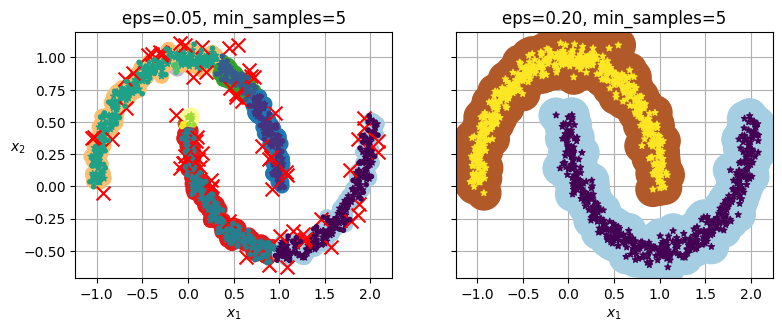

In [36]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [37]:
dbscan = dbscan2

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [39]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [40]:
knn.predict_proba(X_new)

array([[0.24, 0.76],
       [1.  , 0.  ],
       [0.16, 0.84],
       [1.  , 0.  ]])

In [41]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

In [42]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [43]:
gm.weights_

array([0.59630389, 0.19972482, 0.20397129])

In [44]:
gm.means_

array([[ 0.49319475,  0.25430576],
       [-0.75698532,  0.55817771],
       [ 1.74802268, -0.05965283]])

In [45]:
gm.covariances_

array([[[ 0.17465662, -0.10755075],
        [-0.10755075,  0.2921158 ]],

       [[ 0.04906079,  0.05751782],
        [ 0.05751782,  0.08167414]],

       [[ 0.05343615,  0.06316376],
        [ 0.06316376,  0.08970369]]])

In [46]:
gm.converged_

True

In [47]:
gm.n_iter_

17

In [48]:
gm.predict(X)

array([2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0,
       2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0,
       1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1,
       0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1,
       2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2,

In [49]:
gm.predict_proba(X).round(3).round(3)

array([[0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.956, 0.   , 0.044],
       ...,
       [0.003, 0.997, 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ]])

In [50]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.74637886,  0.54837104],
       [ 0.65058591, -0.52787594],
       [-0.71036238,  0.71952582],
       [-0.89960896,  0.20784326],
       [ 1.40578658, -0.48280253],
       [ 2.19565922,  0.51688887]])

In [51]:
y_new

array([0, 0, 1, 1, 2, 2])

In [52]:
gm.score_samples(X).round(2)

array([-0.56, -1.56, -2.25, -2.01, -1.46, -1.49, -1.18, -1.7 , -1.68,
       -1.75, -1.86, -2.12, -1.63, -1.71, -2.01, -0.03, -1.98, -1.48,
       -0.09, -1.98, -1.3 , -1.51, -2.06, -1.44, -2.12, -0.52, -0.07,
       -0.54, -1.69, -2.1 , -1.88, -2.19, -0.02, -1.61, -0.08, -1.76,
       -1.5 , -1.56, -0.25, -0.33, -1.99, -0.29, -1.04, -1.84, -1.55,
       -1.56, -2.3 , -1.32, -1.67, -0.57, -0.72, -0.34, -0.43, -1.91,
       -2.17, -1.45, -0.67, -1.67, -1.58, -1.53, -1.37, -1.48, -0.4 ,
       -0.78, -2.09, -0.25, -1.92, -1.15, -0.57, -1.59, -0.37, -3.11,
       -1.42, -0.74, -1.59, -1.92, -0.19, -1.55, -1.89, -1.95, -1.46,
       -1.82, -1.57, -0.98, -1.87, -0.44, -1.58, -1.63, -2.33, -0.6 ,
       -1.5 , -1.97, -1.65, -1.58, -0.78, -1.27, -1.44, -1.87, -1.64,
       -0.15, -1.61, -1.27, -1.84, -1.96, -1.64, -0.55, -1.54, -1.38,
       -1.46, -1.73, -1.31, -1.3 , -1.54, -1.59, -0.34, -1.94, -1.61,
       -0.23, -1.58, -1.84, -0.1 , -1.69, -1.21, -1.71, -1.59, -2.06,
       -1.69, -0.04,

/tmp/ipykernel_928/1810030801.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
/tmp/ipykernel_928/1810030801.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


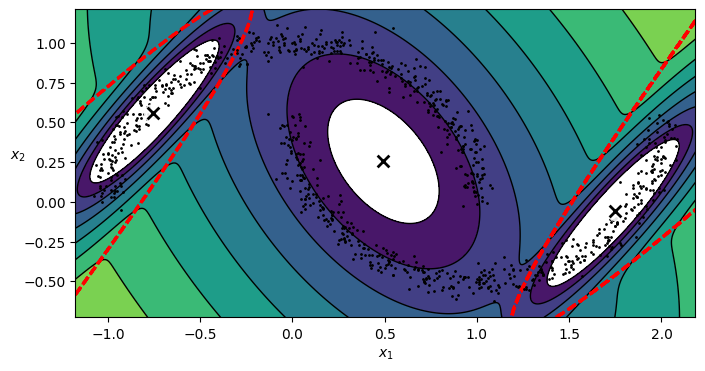

In [53]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

In [54]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

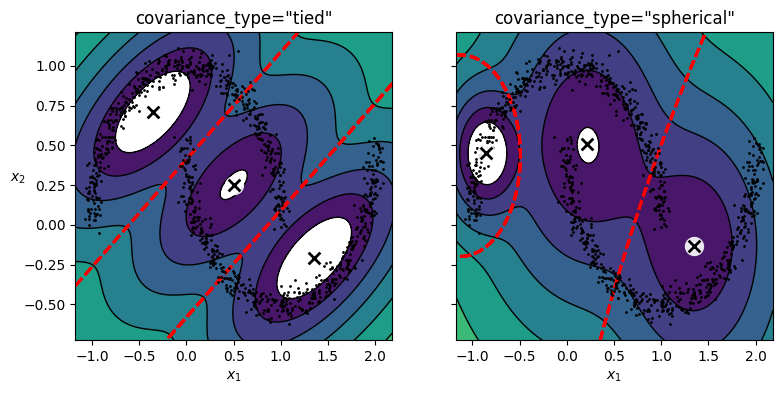

In [55]:
gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

/tmp/ipykernel_928/1810030801.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
/tmp/ipykernel_928/1810030801.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,
/tmp/ipykernel_928/1810030801.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
/tmp/ipykernel_928/1810030801.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


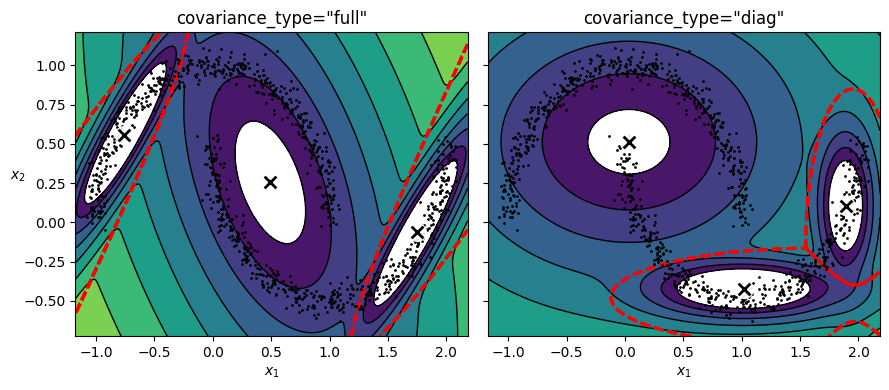

In [56]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

NameError: name 'save_fig' is not defined

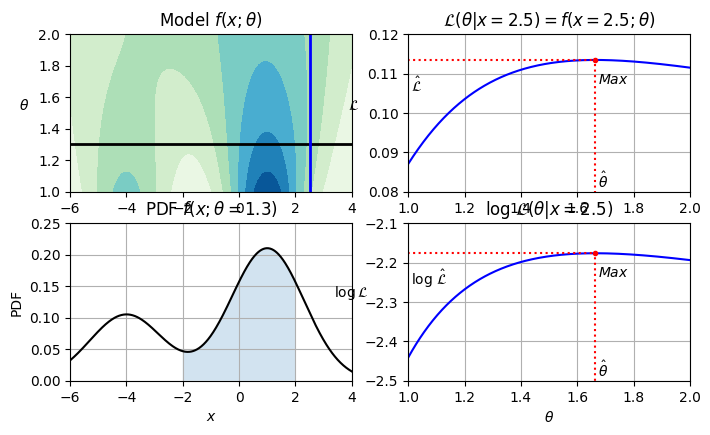

In [60]:
from scipy.stats import norm

x_val = 2.5
std_val = 1.3
x_range = [-6, 4]
x_proba_range = [-2, 2]
stds_range = [1, 2]

xs = np.linspace(x_range[0], x_range[1], 501)
stds = np.linspace(stds_range[0], stds_range[1], 501)
Xs, Stds = np.meshgrid(xs, stds)
Z = 2 * norm.pdf(Xs - 1.0, 0, Stds) + norm.pdf(Xs + 4.0, 0, Stds)
Z = Z / Z.sum(axis=1)[:, np.newaxis] / (xs[1] - xs[0])

x_example_idx = (xs >= x_val).argmax()  # index of the first value >= x_val
max_idx = Z[:, x_example_idx].argmax()
max_val = Z[:, x_example_idx].max()
s_example_idx = (stds >= std_val).argmax()
x_range_min_idx = (xs >= x_proba_range[0]).argmax()
x_range_max_idx = (xs >= x_proba_range[1]).argmax()
log_max_idx = np.log(Z[:, x_example_idx]).argmax()
log_max_val = np.log(Z[:, x_example_idx]).max()

plt.figure(figsize=(8, 4.5))

plt.subplot(2, 2, 1)
plt.contourf(Xs, Stds, Z, cmap="GnBu")
plt.plot([-6, 4], [std_val, std_val], "k-", linewidth=2)
plt.plot([x_val, x_val], [1, 2], "b-", linewidth=2)
plt.ylabel(r"$\theta$", rotation=0, labelpad=10)
plt.title(r"Model $f(x; \theta)$")

plt.subplot(2, 2, 2)
plt.plot(stds, Z[:, x_example_idx], "b-")
plt.plot(stds[max_idx], max_val, "r.")
plt.plot([stds[max_idx], stds[max_idx]], [0, max_val], "r:")
plt.plot([0, stds[max_idx]], [max_val, max_val], "r:")
plt.text(stds[max_idx]+ 0.01, 0.081, r"$\hat{\theta}$")
plt.text(stds[max_idx]+ 0.01, max_val - 0.006, r"$Max$")
plt.text(1.01, max_val - 0.008, r"$\hat{\mathcal{L}}$")
plt.ylabel(r"$\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\mathcal{{L}}(\theta|x={x_val}) = f(x={x_val}; \theta)$")
plt.grid()
plt.axis([1, 2, 0.08, 0.12])

plt.subplot(2, 2, 3)
plt.plot(xs, Z[s_example_idx], "k-")
plt.fill_between(xs[x_range_min_idx:x_range_max_idx+1],
                 Z[s_example_idx, x_range_min_idx:x_range_max_idx+1], alpha=0.2)
plt.xlabel(r"$x$")
plt.ylabel("PDF")
plt.title(fr"PDF $f(x; \theta={std_val})$")
plt.grid()
plt.axis([-6, 4, 0, 0.25])

plt.subplot(2, 2, 4)
plt.plot(stds, np.log(Z[:, x_example_idx]), "b-")
plt.plot(stds[log_max_idx], log_max_val, "r.")
plt.plot([stds[log_max_idx], stds[log_max_idx]], [-5, log_max_val], "r:")
plt.plot([0, stds[log_max_idx]], [log_max_val, log_max_val], "r:")
plt.text(stds[log_max_idx]+ 0.01, log_max_val - 0.06, r"$Max$")
plt.text(stds[log_max_idx]+ 0.01, -2.49, r"$\hat{\theta}$")
plt.text(1.01, log_max_val - 0.08, r"$\log \, \hat{\mathcal{L}}$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\log \, \mathcal{{L}}(\theta|x={x_val})$")
plt.grid()
plt.axis([1, 2, -2.5, -2.1])

plt.show()

In [58]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 2747.511100237776
aic = 2664.07926049508
n_params = 17


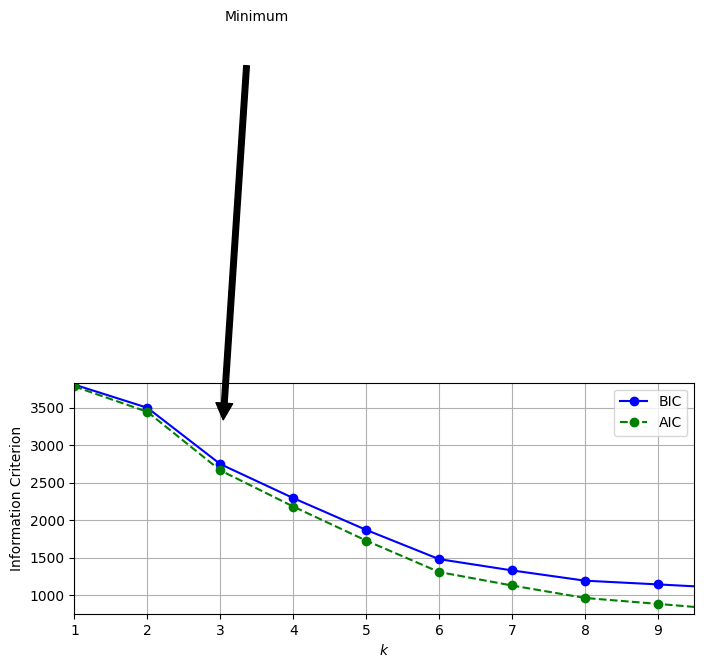

In [59]:
# extra code – this cell generates and saves Figure 9–20

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()
plt.show()
